In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('water.csv', sep =',')

In [86]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [34]:
df.mortality.unique()

array([1247, 1668, 1466, 1800, 1609, 1558, 1807, 1299, 1637, 1359, 1392,
       1755, 1519, 1307, 1254, 1491, 1555, 1428, 1318, 1260, 1723, 1379,
       1742, 1574, 1569, 1096, 1591, 1402, 1772, 1828, 1704, 1702, 1581,
       1309, 1259, 1427, 1724, 1175, 1486, 1456, 1696, 1236, 1711, 1444,
       1987, 1495, 1369, 1257, 1587, 1713, 1557, 1640, 1709, 1625, 1527,
       1627, 1485, 1378])

In [35]:
df.hardness.unique()

array([105,  17,   5,  14,  18,  10,  15,  78,  84,  73,  12,  21,  96,
        20,  39, 122,  44,  94,   8,   9,  91, 138,  16,  37,  26,  59,
       133,  27,   6, 107,  90, 101,  13,  49,  68,  50,  75,  71,  57,
        60,  53,  81])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [37]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


#1

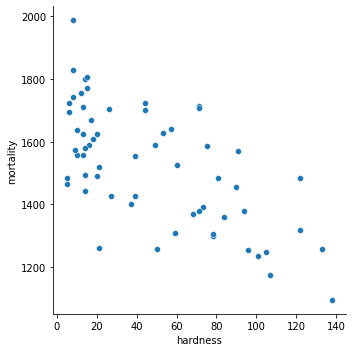

In [38]:
sns.relplot(data = df, y = df.mortality, x = df.hardness)
#выглядит так,будто есть средней силы обратная связь смертности и жесткости воды.

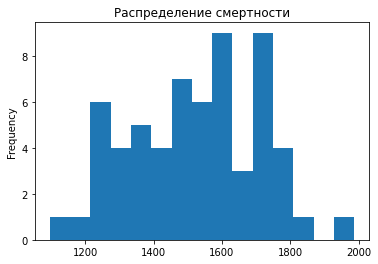

In [39]:
df.mortality.plot(kind = 'hist', title = 'Распределение смертности', bins = 15)

In [40]:
#учитывая небольшое количество наблюдений, такое распределение можно рассматривать как нормальное.

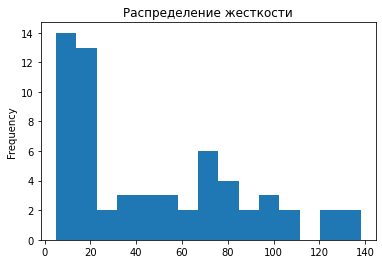

In [41]:
df.hardness.plot(kind = 'hist', title = 'Распределение жесткости', bins = 15)

In [42]:
#Распределение жесткости не выглядит нормальным. Количество ниизких значений жесткости доминирует, а остальные распределены более менее равномерно.
#В общем, не нормальное распределение, при всем уважении.

In [43]:
df[['mortality', 'hardness']].corr()#КК Пирсона

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [44]:
df[['mortality', 'hardness']].corr(method = 'spearman')#КК Спирмана

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [45]:
df[['mortality', 'hardness']].corr(method = 'kendall')#КК Кендала

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [48]:
X = df[['hardness']]
y = df['mortality']

In [49]:
from scipy.sparse.construct import random
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 42)

In [51]:
X_train.shape

(42, 1)

In [52]:
y_test.shape

(19,)

In [55]:
model = LinearRegression()#инициируем метод LinearRegression
model.fit(X_train, y_train)#обучаем ее на учебных данных

LinearRegression()

In [56]:
model.coef_

array([-3.13167087])

In [57]:
y_pred = model.predict(X_test)#в новую переменную y_pred запишем значения, которые можель формирует на оснвании своего прогноза 
y_pred#и тестовых значений х

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [58]:
y_test#выведем реальные значения у из тестовой группы

0     1247
5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
33    1309
59    1485
16    1555
3     1800
53    1709
17    1428
8     1637
6     1807
41    1236
Name: mortality, dtype: int64

In [60]:
model.score(X_test,y_test)#коэффициент детерминации нашей модели

0.5046490611017092

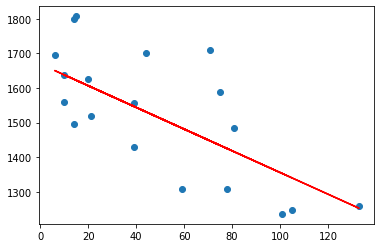

In [62]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c = 'r')

In [63]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [65]:
X_const = sm.add_constant(X_train)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [67]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           7.83e-06
Time:                        12:53:48   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [68]:
print('Parameters: ', results.params)#коэффициент R2 был ~0.5 в sklearn, здесь он = 0.396789. Это потому что ststsmodel считает этот 
print('R2: ', results.rsquared)#этот коэффициент только для учебных данных?

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912278


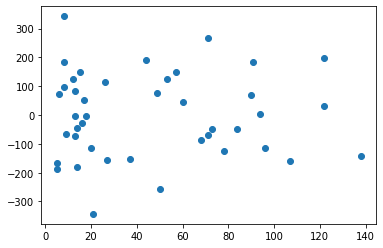

In [69]:
#по поводу распределения можно сказать, что оно такое неплохое получилось, равномерное. Ну и R2 = 0.5 тоже говорит, что модель в принципе ОК
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 1., 0., 2., 5., 3., 2., 5., 3., 2., 2., 5., 3., 2., 4., 0.,
        1., 0., 1.]),
 array([-3.43207209e+02, -3.08892795e+02, -2.74578382e+02, -2.40263968e+02,
        -2.05949554e+02, -1.71635140e+02, -1.37320726e+02, -1.03006312e+02,
        -6.86918979e+01, -3.43774840e+01, -6.30700817e-02,  3.42513439e+01,
         6.85657578e+01,  1.02880172e+02,  1.37194586e+02,  1.71509000e+02,
         2.05823414e+02,  2.40137827e+02,  2.74452241e+02,  3.08766655e+02,
         3.43081069e+02]),
 <a list of 20 Patch objects>)

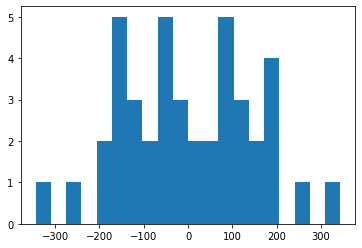

In [70]:
plt.hist(results.resid, bins=20)

#2

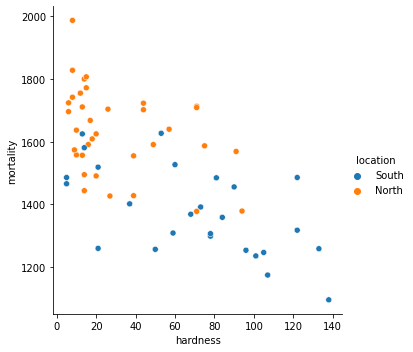

In [71]:
sns.relplot(data = df, y = df.mortality, x = df.hardness, hue='location')
#добавил дополнительный параметр на график. На юге связь более выраженная.

In [88]:
df_south = df.loc[df.location == 'South']

In [92]:
df_south.describe()

,Unnamed: 0,mortality,hardness
count,26.000000,26.000000,26.000000
mean,31.346154,1376.807692,69.769231
std,18.742342,140.269175,40.360682
min,1.000000,1096.000000,5.000000
25%,14.250000,1259.250000,40.250000
50%,33.500000,1364.000000,75.500000
75%,46.500000,1485.750000,99.750000
max,60.000000,1627.000000,138.000000


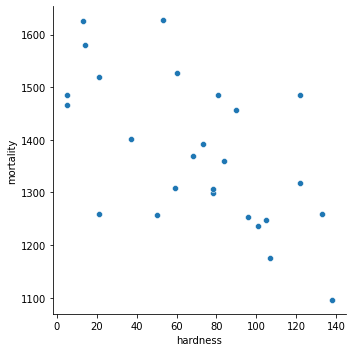

In [89]:
sns.relplot(data = df_south, x = df_south.hardness, y = df_south.mortality)

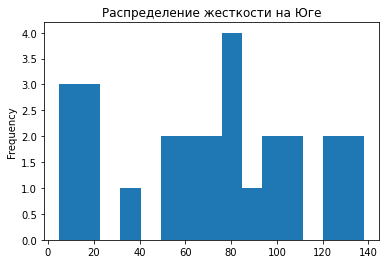

In [91]:
df_south.hardness.plot(kind = 'hist', title = 'Распределение жесткости на Юге', bins = 15)
#всего 26 значений, распределены довольно равномерно

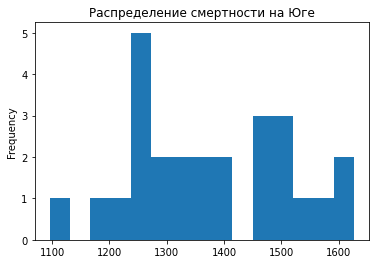

In [93]:
df_south.mortality.plot(kind = 'hist', title = 'Распределение смертности на Юге', bins = 15)

In [96]:
df_south[['mortality','hardness']].corr(method = 'pearson')

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [98]:
df_south[['mortality','hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [99]:
df_south[['mortality','hardness']].corr(method = 'kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [100]:
X = df_south[['hardness']]
y = df_south['mortality']

In [101]:
from scipy.sparse.construct import random
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 666)

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [103]:
y_pred = model.predict(X_test)
y_pred

array([1322.10488251, 1408.86246586, 1382.6714973 , 1371.21294855,
       1448.1489187 , 1294.27697841, 1297.55084948, 1331.92649571])

In [104]:
y_test

39    1456
27    1402
57    1627
56    1527
54    1625
37    1175
0     1247
9     1359
Name: mortality, dtype: int64

In [107]:
model.score(X_test, y_test)#коэфф R2 низкий

0.2116388336027114

In [108]:
#все библиотеки уже импортированы, сделаю распределение остатков
X_const = sm.add_constant(X_train)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [109]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     7.670
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0137
Time:                        14:25:19   Log-Likelihood:                -108.60
No. Observations:                  18   AIC:                             221.2
Df Residuals:                      16   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.4291     48.601     30.234      0.0

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


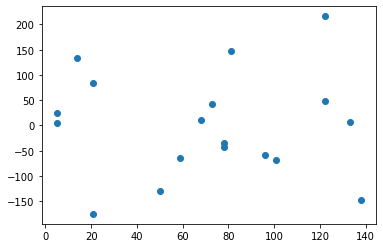

In [110]:
plt.scatter(X_const.iloc[:, 1], results.resid, title = 'Распределение остатков Юг')
#закономерностей каких-то очевидных нет.

(array([2., 1., 3., 2., 3., 3., 1., 1., 1., 1.]),
 array([-175.05343442, -135.92038551,  -96.78733661,  -57.65428771,
         -18.5212388 ,   20.6118101 ,   59.744859  ,   98.8779079 ,
         138.01095681,  177.14400571,  216.27705461]),
 <a list of 10 Patch objects>)

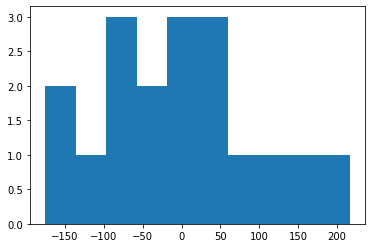

In [111]:
#ошибок в меньшую сторону больше, но в общем при таком количестве данных что можно требовать от модели
plt.hist(results.resid, bins = 10 )

In [113]:
df_north = df.loc[df.location == 'North', ['hardness','mortality']]

In [114]:
df_north.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   hardness   35 non-null     int64
 1   mortality  35 non-null     int64
dtypes: int64(2)
memory usage: 840.0 bytes


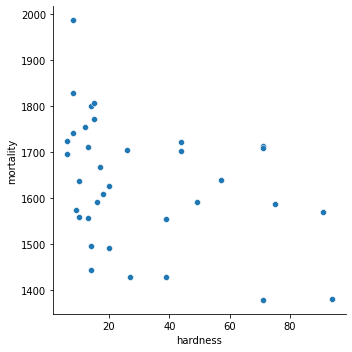

In [116]:
sns.relplot(data = df_north, x = df_north.hardness, y = df_north.mortality)
#если бы не та точка наверху с высокой смертностью, то можно было бы сказать, что связи совсем почти нет

(array([4., 3., 3., 6., 4., 9., 3., 2., 0., 1.]),
 array([1378. , 1438.9, 1499.8, 1560.7, 1621.6, 1682.5, 1743.4, 1804.3,
        1865.2, 1926.1, 1987. ]),
 <a list of 10 Patch objects>)

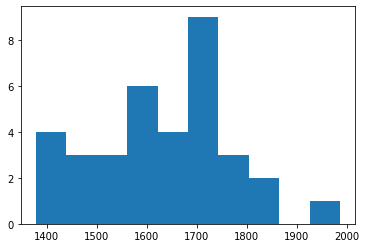

In [119]:
plt.hist(df_north.mortality, bins = 10)
#распределение смертности умеренно - ненормальное, есть знакомые очертания

(array([14.,  7.,  2.,  2.,  3.,  1.,  0.,  4.,  0.,  2.]),
 array([ 6. , 14.8, 23.6, 32.4, 41.2, 50. , 58.8, 67.6, 76.4, 85.2, 94. ]),
 <a list of 10 Patch objects>)

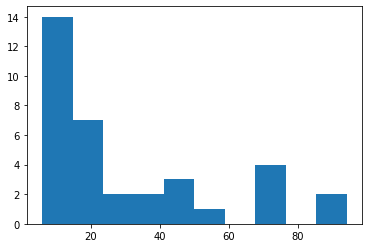

In [120]:
plt.hist(df_north.hardness, bins = 10)
#распределение жесткости воды не нормальное

In [122]:
df_north[['mortality','hardness']].corr()#пирсон говорит, что на Севере связь на 33% слабее, чем на Юге (было -0.6)

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [123]:
df_north[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [124]:
X = df[['hardness']]
y = df['mortality']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 7)

In [129]:
model = LinearRegression()

In [132]:
model.fit(X_train, y_train)

LinearRegression()

In [134]:
y_pred = model.predict(X_test)

In [135]:
model.score(X_test,y_test)#тем временем предсказательная сила модели на довольно неплохом уровне

0.48094883232122965

In [136]:
X_const = sm.add_constant(X_train)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [137]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     26.57
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           7.22e-06
Time:                        14:56:05   Log-Likelihood:                -267.39
No. Observations:                  42   AIC:                             538.8
Df Residuals:                      40   BIC:                             542.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1666.9064     35.993     46.312      0.0

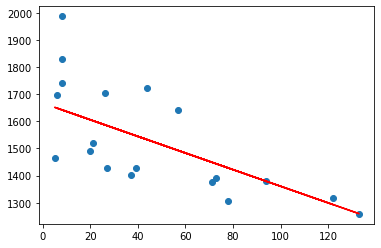

In [141]:
plt.scatter(X_test, y_test)#расположение значений тестовой группы относительно линии регрессии
plt.plot(X_test, y_pred, c = 'r')

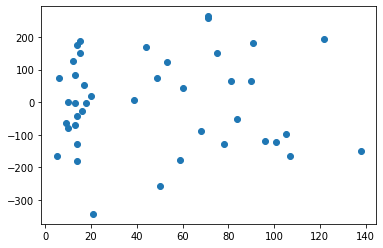

In [139]:
plt.scatter(X_const.iloc[:, 1], results.resid)
#в левой части просматривается область повышенной концентрации ошибок

(array([1., 1., 4., 5., 7., 6., 6., 3., 7., 2.]),
 array([-342.64631094, -282.04628833, -221.44626573, -160.84624312,
        -100.24622051,  -39.6461979 ,   20.9538247 ,   81.55384731,
         142.15386992,  202.75389252,  263.35391513]),
 <a list of 10 Patch objects>)

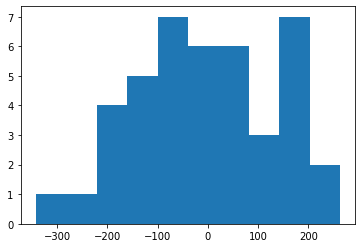

In [140]:
plt.hist(results.resid, bins = 10)